# STAT 207 Project 02 - Video Game Reviews and US Sales Analysis

Yosef Stifanos (yds2) and AJ Garcia (garcia80)

### Contribution Report

If you open this document, you should edit and complete the contribution report.  Please complete this report if you work individually, in a group and your submission is the one to be graded, or in a group but someone else should be graded.

In this contribution report below you should list of the following:
1. The netID for the project submission to be graded.  (Some groups have each member create their own version of the document, but only one needs to be submitted for grading.  Other groups have only one member compose and submit the project.)
2. Names and netIDs of each team member.
3. Contributions to report of each team member.

*For example:*

*<u>Teammates:</u>*

*doe105 should be graded.  John Smith (smith92) & Jane Doe (doe105) worked together on all parts of this project*, 

OR

*doe105 should be graded*

<i>1. John Smith (smith92) completed parts 1 - 3</i>

<i>2. Jane Doe (doe105) completed parts 4 - 5</i>

<i>We both reviewed the full document before submission.</i>

**this submission should be graded. my teammate is AJ Garcia - netID: garcia80.**
1. **All work was completed together!**
2. **Yosef Stifanos completed 1-5** 
3. **AJ Garcia completed 1-5**

## 1. Introduction

### Dataset Context
Our analysis explores the relationship between video game review scores and sales data from 2004-2010.  This dataset provides insights into how critical reception relates to commercial success in the gaming industry. The data was collected and curated by Dr. Joe Cox, providing information about video game sales and review scores.

### Population and Sample
While our dataset represents video games from 2004-2010, we'll treat it as a sample from the broader population of all video games. To ensure our analysis is manageable and representative, we'll work with a random sample of the data. Our population of interest is highly rated games specifically. 

### Motivation
The answer to our research questions would be useful for game publishers and game developers when deciding what games to make . By comparing if higher rated games leads to more sales developers can see whether it is worth their time and money to put in more resources into the game or put those resources elsewhere like marketing for example. Where this would matter most is for indie-game developers since they are working with a much smaller budget and a smaller team, so decisions like these matter a lot more. Overall the answer to this question could lead to more growth in the video game industry by making video game developement more profitable.

In [16]:
#Imports here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [17]:
df = pd.read_csv('/Users/ajmon/Desktop/stat207/garcia80/project_02/video_games.csv', encoding_errors='ignore')

In [43]:
df.shape

(1770, 168)

In [19]:
# Take a random sample of 200 games
sample_df = df.sample(n=200)

In [42]:
sample_df.shape


(200, 167)

### Research Questions
1. What proportion of games receive "high" review scores (defined as 80 or above), and what is the likely range for this proportion in all video games?
2. Is there evidence that games with review scores above 80 have higher average sales than the industry standard?

## 2. Confidence Interval Analytical Tasks

#### Research Question: 
What proportion of games receive "high" review scores (defined as 80 or above), and what is the likely range for this proportion in all video games?

#### Data Cleaning and Preparation 

To clean the data for our variable of interest(Review Scores) we dropped all 'NA' values in this variable. Once the cleaning was done in order to prep we created a new variable called 'highly_rated_games' and recorded whether a game was high rated or not with a 1 or a 0. A game is considered highly rated if it's review score was >= 80.

In [21]:
# Create binary variable for high-rated games
sample_df['is_highly_rated_80'] = (sample_df['Review Score'] >= 80).astype(int)
sample_df

,Console,Title,US Sales (millions),Block4,Block2,Block1,Block0.5,YearReleased,2004,2005,...,Volleyball,Wakeboarding,Wrestling,FirstPerson,Platform,Isometric,SideScrolling,TopDown,ThirdPerson,is_highly_rated_80
743,PlayStation 3,DiRT,0.16,0,0,0,0,2007,0,0,...,0,0,0,1,0,0,0,0,1,1
910,Sony PSP,Cube,0.02,0,0,0,0,2007,0,0,...,0,0,0,0,0,0,0,0,1,0
1474,Nintendo Wii,LEGO Rock Band,0.37,0,0,0,0,2009,0,0,...,0,0,0,0,0,0,0,0,1,0
459,Sony PSP,Star Trek: Tactical Assault,0.02,0,0,0,0,2006,0,0,...,0,0,0,0,0,0,0,0,1,0
1746,X360,Supreme Commander 2,0.15,0,0,0,0,2010,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,X360,Tom Clancy's EndWar,0.56,0,0,0,1,2008,0,0,...,0,0,0,0,0,0,0,0,1,0
1394,PlayStation 3,Resident Evil 5,1.62,0,0,1,1,2009,0,0,...,0,0,0,0,0,0,0,0,1,1
1419,PlayStation 3,Borderlands,0.83,0,0,0,1,2009,0,0,...,0,0,0,1,0,0,0,0,0,1
1513,Sony PSP,MLB 09: The Show,0.24,0,0,0,0,2009,0,0,...,0,0,0,1,0,0,0,0,1,0


In [22]:
# Remove any missing values
sample_df = sample_df.dropna(subset=['Review Score'])
sample_df

,Console,Title,US Sales (millions),Block4,Block2,Block1,Block0.5,YearReleased,2004,2005,...,Volleyball,Wakeboarding,Wrestling,FirstPerson,Platform,Isometric,SideScrolling,TopDown,ThirdPerson,is_highly_rated_80
743,PlayStation 3,DiRT,0.16,0,0,0,0,2007,0,0,...,0,0,0,1,0,0,0,0,1,1
910,Sony PSP,Cube,0.02,0,0,0,0,2007,0,0,...,0,0,0,0,0,0,0,0,1,0
1474,Nintendo Wii,LEGO Rock Band,0.37,0,0,0,0,2009,0,0,...,0,0,0,0,0,0,0,0,1,0
459,Sony PSP,Star Trek: Tactical Assault,0.02,0,0,0,0,2006,0,0,...,0,0,0,0,0,0,0,0,1,0
1746,X360,Supreme Commander 2,0.15,0,0,0,0,2010,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,X360,Tom Clancy's EndWar,0.56,0,0,0,1,2008,0,0,...,0,0,0,0,0,0,0,0,1,0
1394,PlayStation 3,Resident Evil 5,1.62,0,0,1,1,2009,0,0,...,0,0,0,0,0,0,0,0,1,1
1419,PlayStation 3,Borderlands,0.83,0,0,0,1,2009,0,0,...,0,0,0,1,0,0,0,0,0,1
1513,Sony PSP,MLB 09: The Show,0.24,0,0,0,0,2009,0,0,...,0,0,0,1,0,0,0,0,1,0


In [23]:
### Descriptive Analytics
n_games = len(sample_df)
high_rated_prop = sample_df['is_highly_rated_80'].mean()

print("Descriptive Statistics for Review Scores:")
print(f"Sample size: {n_games}")
print(f"Proportion of highly-rated games: {high_rated_prop:.3f}")
print("\nReview Score Summary:")
print(sample_df['Review Score'].describe())

Descriptive Statistics for Review Scores:
Sample size: 200
Proportion of highly-rated games: 0.250

Review Score Summary:
count    200.000000
mean      69.365000
std       13.422091
min       20.000000
25%       60.000000
50%       71.000000
75%       79.250000
max       95.000000
Name: Review Score, dtype: float64


### Interpretation of Numerical Summaries: 

The sample size for our variable is 200. One numerical summary calculated for the variable 'Review Score' is the proportion of review scores that are greter than or equal to 80, which is 0.200 or 20.0%. This means that 24.5% of the games in the dataset are highly rated games. Another numerical summary is the mean or average and that is 66.71, so the average review score for all games in dataset is ~67.

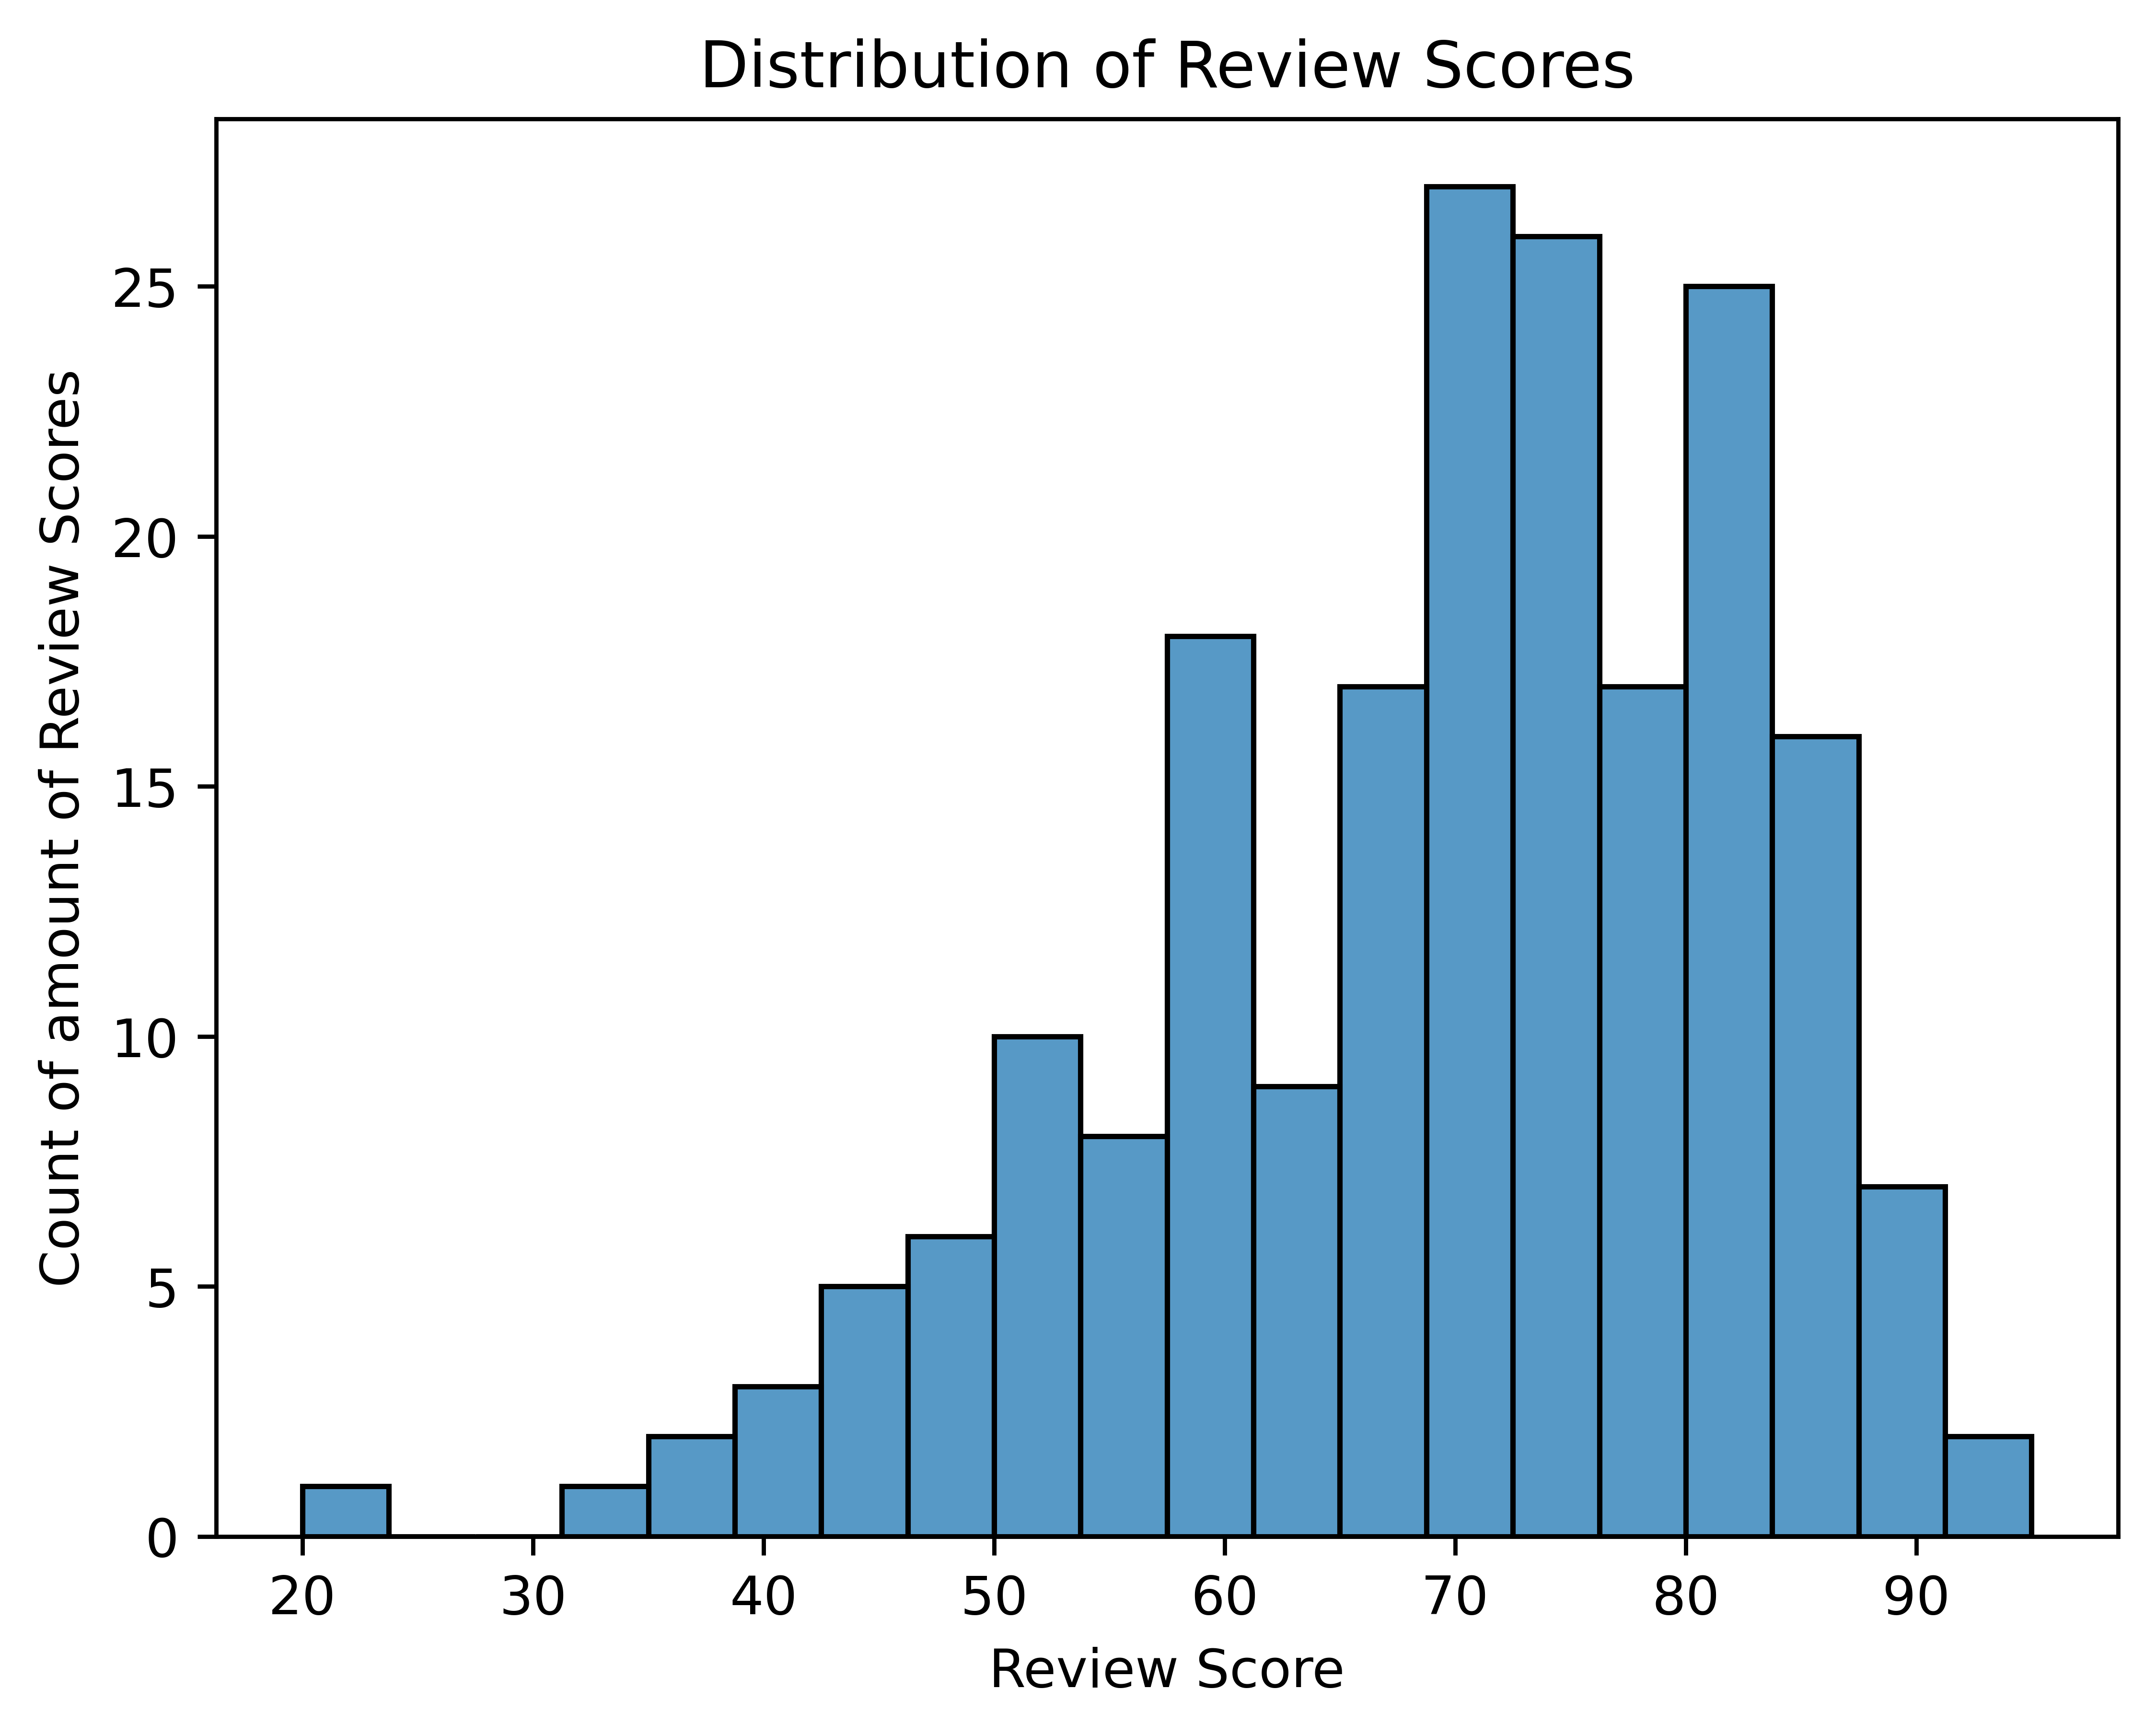

In [24]:
# Visualize review score distribution

plt.figure(dpi=800)
sns.histplot(data=sample_df, x='Review Score', bins=20)
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Count of amount of Review Scores')
plt.show()

In [25]:
# Confidence Interval Calculation

def bootstrap_proportion(data, n_bootstrap=10000, conf_level=0.95):
    bootstrap_props = []
    for _ in range(n_bootstrap):
        boot_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_props.append(np.mean(boot_sample))
    
    lower = np.percentile(bootstrap_props, (1 - conf_level) * 100 / 2)
    upper = np.percentile(bootstrap_props, 100 - (1 - conf_level) * 100 / 2)
    return lower, upper

ci_lower, ci_upper = bootstrap_proportion(sample_df['is_highly_rated_80'])
print(f"\n95% Confidence Interval for proportion of highly-rated games:")
print(f"({ci_lower:.3f}, {ci_upper:.3f})")


95% Confidence Interval for proportion of highly-rated games:
(0.190, 0.310)


### Confidence Interval and Level Interpretation:

The confidence level used is 95% and the estimated confidence interval is (0.145, 0.255). The confidence level represents that if we were to generate a bunch of random samples and calculate 95% confidence intervals for those samples then 95% of our intervals would contain the true parameter of interest. The confidence interval is the range of reasonable values for our parameter of interest. Essentially we are 95% confident the true population proportion for highly rated games is in the range of 14.5% to 25.5%.

## 3. Hypothesis Testing Analytical Tasks 

#### Research Question: Is there evidence that games with review scores above 80 have higher average sales than the industry standard?

In [26]:
# Data Cleaning and Preparation
# Clean sales data and create groups

sample_df = sample_df.dropna(subset=['US Sales (millions)', 'Review Score'])
high_rated_sales = sample_df[sample_df['is_highly_rated_80'] == 1]['US Sales (millions)']
low_rated_sales = sample_df[sample_df['is_highly_rated_80'] == 0]['US Sales (millions)']

print("\nAfter cleaning:")
print(f"Number of highly rated games (≥80): {len(high_rated_sales)}")
print(f"Number of other games (<80): {len(low_rated_sales)}")
print(f"Total games after cleaning: {len(sample_df)}") 



After cleaning:
Number of highly rated games (≥80): 50
Number of other games (<80): 150
Total games after cleaning: 200


#### Data Cleaning and Preparation 

To clean our data we dropped all 'na' values for our variables of interest('US Sales (millions)' and 'Review Score'). Then we created two dataframes, one containing all the highly rated games and one containing the not highly rated games. The two dataframes will be used later for our analysis.


In [27]:
# Descriptive Analytics

print("\nSales Summary Statistics:")
print("\nHighly Rated Games (Score ≥ 80):")
print(high_rated_sales.describe())
print("\nOther Games (Score < 80):")
print(low_rated_sales.describe())



Sales Summary Statistics:

Highly Rated Games (Score ≥ 80):
count    50.000000
mean      1.058800
std       1.982138
min       0.110000
25%       0.282500
50%       0.445000
75%       0.912500
max      11.350000
Name: US Sales (millions), dtype: float64

Other Games (Score < 80):
count    150.000000
mean       0.267333
std        0.387095
min        0.010000
25%        0.070000
50%        0.140000
75%        0.325000
max        3.200000
Name: US Sales (millions), dtype: float64


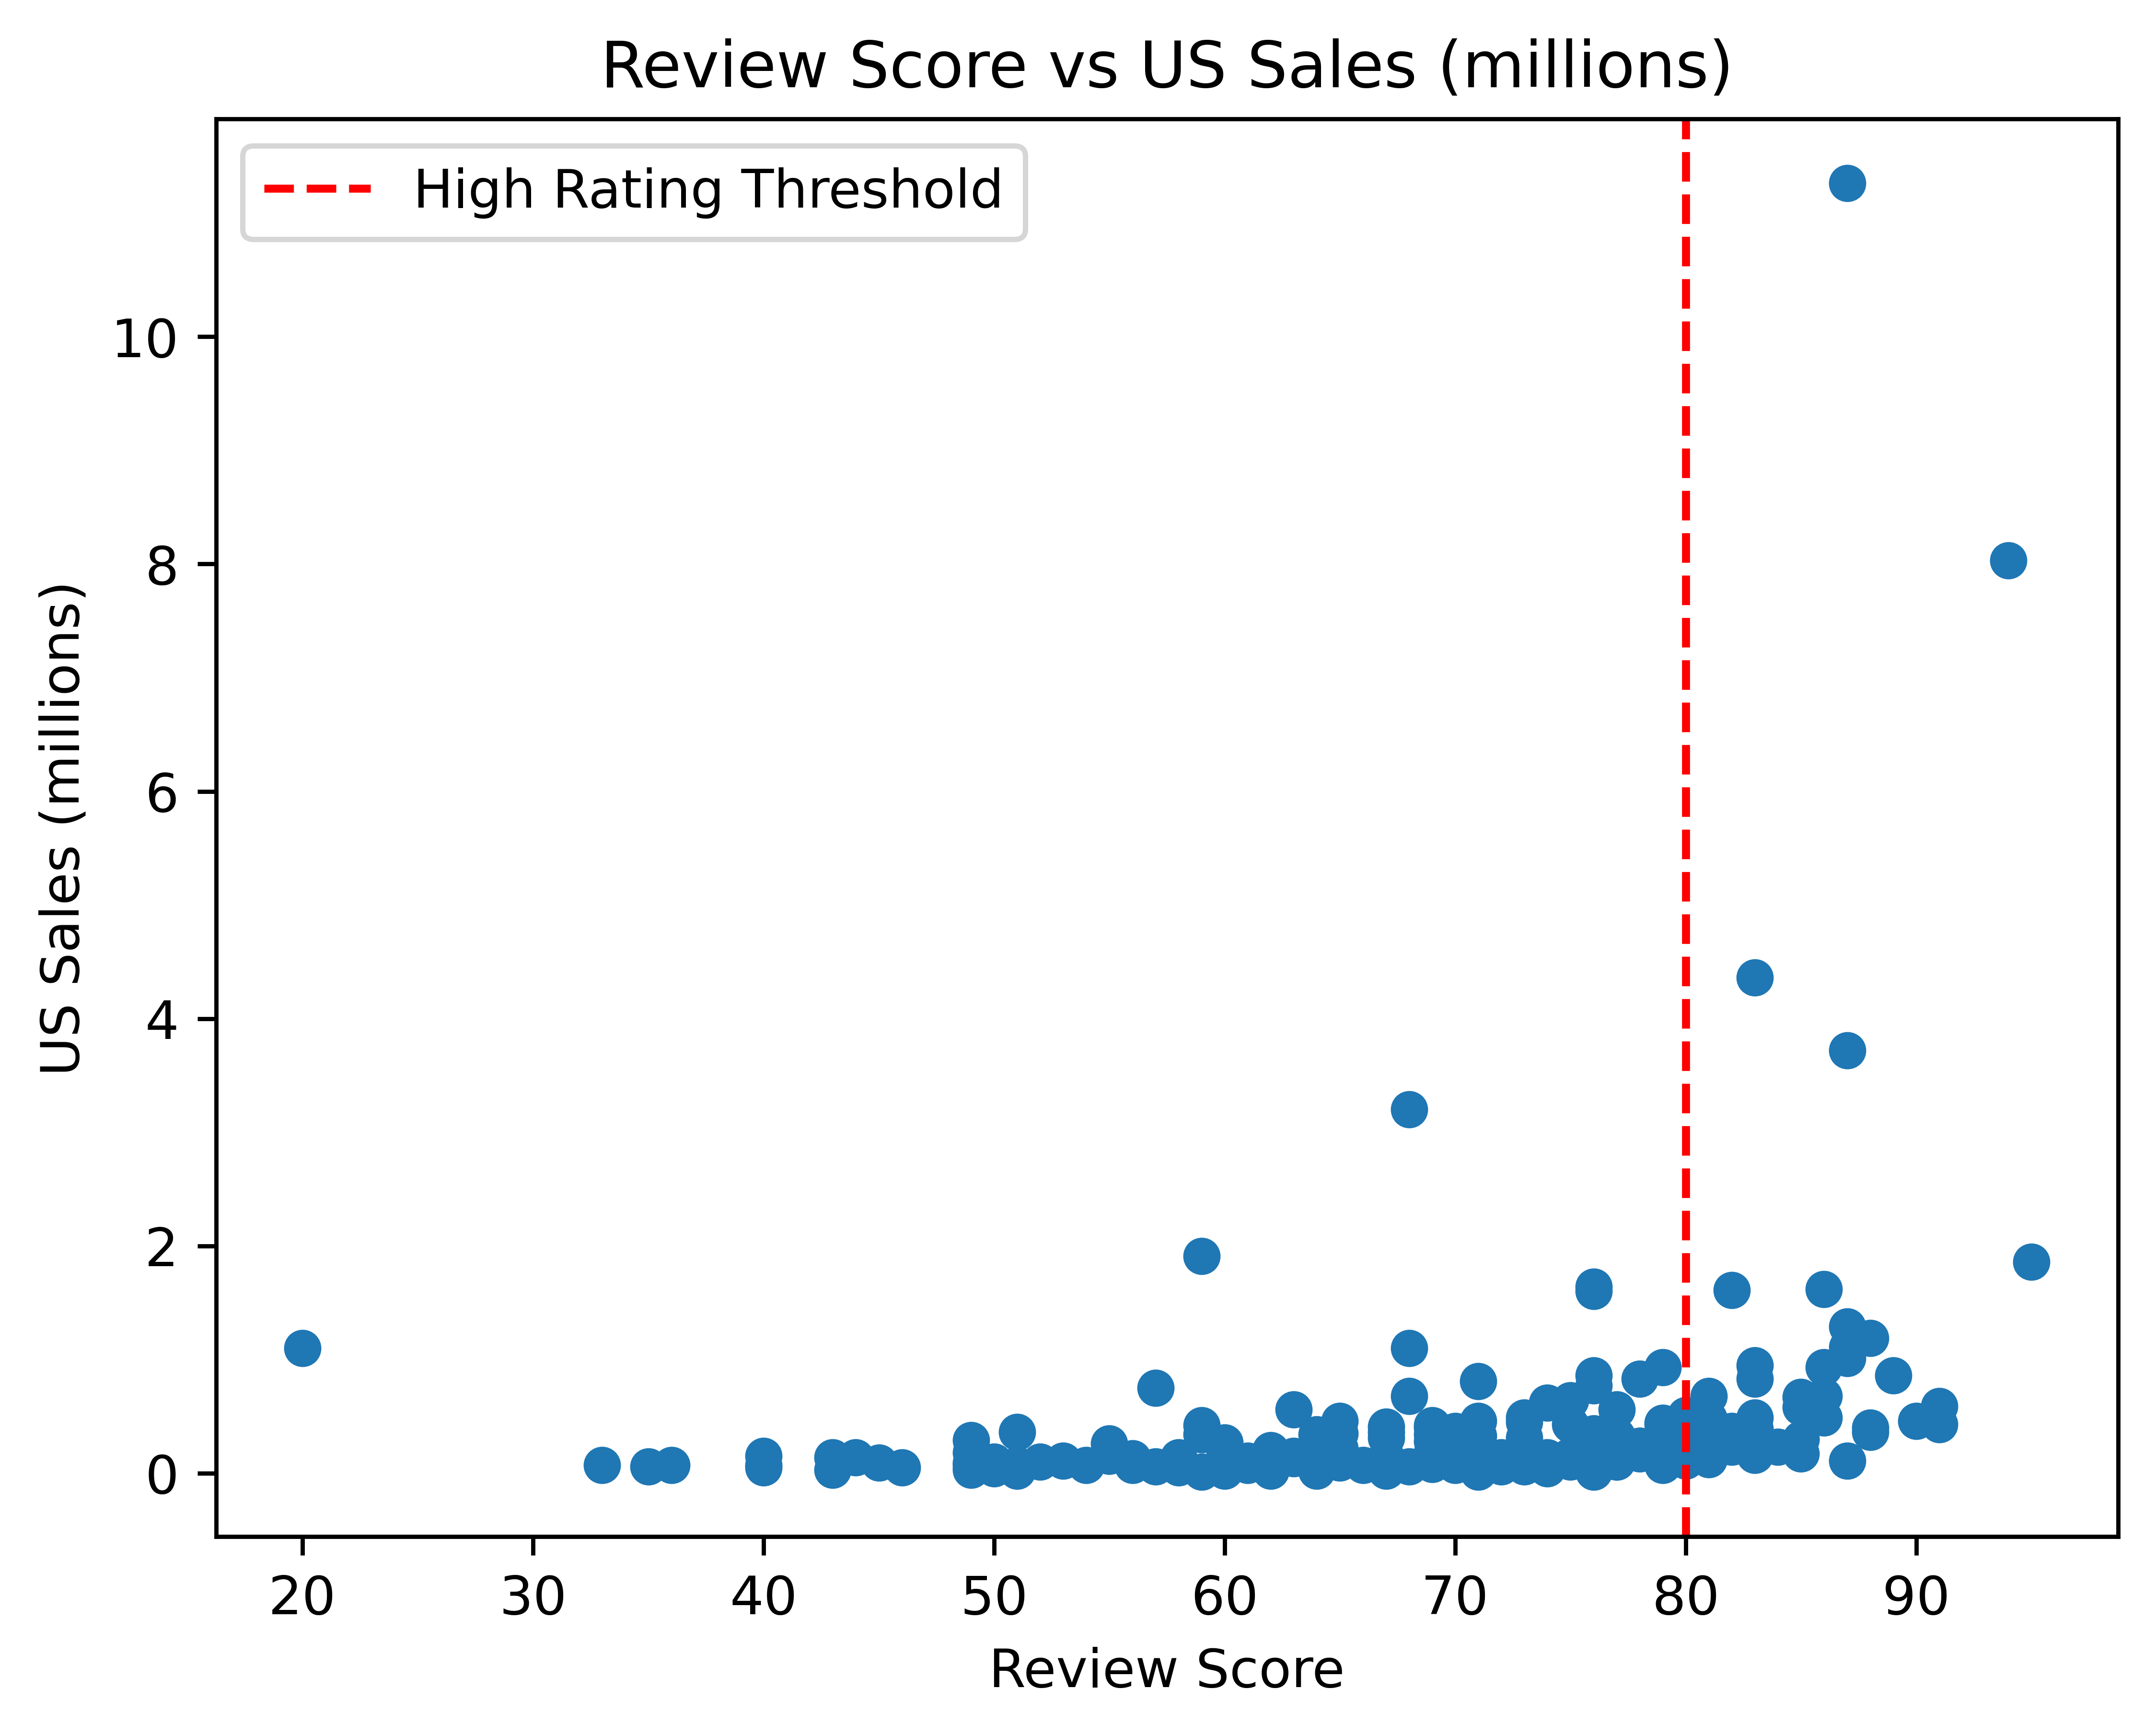

In [38]:
# Additional visualization: Review Score vs US Sales (millions)

plt.figure(dpi=800)
plt.scatter(sample_df['Review Score'], sample_df['US Sales (millions)'])
plt.axvline(x=80, color='r', linestyle='--', label='High Rating Threshold')
plt.title('Review Score vs US Sales (millions)')
plt.xlabel('Review Score')
plt.ylabel('US Sales (millions)')
plt.legend()
plt.show()

#### Interpretation of Results 

Looking at the results of the numerical summaries we can see that the mean and median for highly rated games is very different, which means there is likely outliers affecting the mean and that is why we will use the median as our measure of center. Comparing the median of the highly rated games(0.35) and not highly rated games(0.13) we can see there is a significant difference between them. Looking at the graph we can see there are outliers mainly for the games with higher review scores and the range/spread is from 20 - ~95. The shape of the graph is skewed to the right with most of the values being in the lower review scores.  

#### Hypothesis Test 

H0: μ_high - μ_low = 0 (no difference in mean sales between high and low rated games)
H1: μ_high - μ_low > 0 (highly rated games have higher mean sales) 

The parameter of interest is the characteristic that you are making inferences about and the parameter of interest we are using is the mean. 
The siginificance level is 0.05.

In [29]:
# Hypothesis Test

def bootstrap_difference_test(data1, data2, n_bootstrap=10000):
    observed_diff = np.mean(data1) - np.mean(data2)
    combined = np.concatenate([data1, data2])
    n1, n2 = len(data1), len(data2)
    
    bootstrap_diffs = []
    for _ in range(n_bootstrap):
        boot_sample = np.random.choice(combined, size=len(combined), replace=True)
        boot_data1 = boot_sample[:n1]
        boot_data2 = boot_sample[n1:]
        boot_diff = np.mean(boot_data1) - np.mean(boot_data2)
        bootstrap_diffs.append(boot_diff)
    
    p_value = np.mean([diff >= observed_diff for diff in bootstrap_diffs])
    return p_value, observed_diff


In [40]:
p_value, observed_diff = bootstrap_difference_test(high_rated_sales, low_rated_sales)
print(f"\nObserved difference in mean US sales: {observed_diff:.3f} million units")
print(f"p-value: {p_value:.4f}")


Observed difference in mean US sales: 0.791 million units
p-value: 0.0005


### Hypothesis Testing Analytical Interpretation: 

The results of the hypothesis test are that we reject the null hypothesis since our significance level is 0.05 and our p-value of 0.0002 is lower than that. The siginificance level is the maximum probability required to reject the null hypothesis or the probability of rejecting the null hypothesis when the null hypothesis is true. The p-value is the probability of getting a test statistic as extreme or more extreme (in the direction of the alternative hypothesis), assuming the null hypothesis is true. In our case that would mean the probability of getting a mean difference in sales at least as extreme as observed assuming that that there is no differnece in sales.




## Any other type of analysis/question you want to explore with this dataset.

<u>Why?</u>: Sometimes undergraduate students will put the research projects that they did for their classes on their resumes when applying for graduate schools, internships, and jobs. If you're interested in showcasing cool analyses to write on your resume, this section could help with that. **(This section is not worth any points though).**

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

c:\Users\ajmon\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
c:\Users\ajmon\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
c:\Users\ajmon\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
c:\Users\ajmon\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

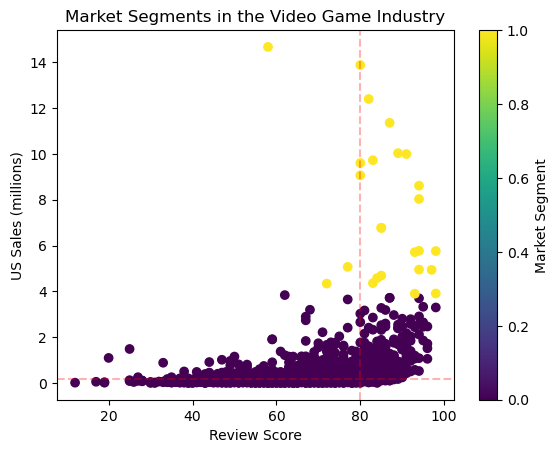

In [32]:
## 1. Market Segmentation Analysis
df['Commercial_Success'] = df['US Sales (millions)'] > df['US Sales (millions)'].median()
df['Critical_Success'] = df['Review Score'] >= 80

# Clean data
analysis_df = df.dropna(subset=['US Sales (millions)', 'Review Score', 'Genre'])

# Prepare features for clustering
features = ['US Sales (millions)', 'Review Score']
X = analysis_df[features].copy()

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters
silhouette_scores = []
K = range(2, 8)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

optimal_k = K[np.argmax(silhouette_scores)]

# Perform clustering with optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
analysis_df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize market segments
plt.figure()
scatter = plt.scatter(analysis_df['Review Score'], 
                     analysis_df['US Sales (millions)'],
                     c=analysis_df['Cluster'], 
                     cmap='viridis')
plt.axhline(y=analysis_df['US Sales (millions)'].median(), 
            color='r', linestyle='--', alpha=0.3)
plt.axvline(x=80, color='r', linestyle='--', alpha=0.3)
plt.xlabel('Review Score')
plt.ylabel('US Sales (millions)')
plt.title('Market Segments in the Video Game Industry')
plt.colorbar(scatter, label='Market Segment')
plt.show()

In [33]:
## 2. Genre Performance Analysis

# Calculate genre performance metrics
genre_metrics = analysis_df.groupby('Genre').agg({
    'US Sales (millions)': ['mean', 'median', 'count'],
    'Review Score': ['mean', 'median'],
    'Commercial_Success': 'mean',
    'Critical_Success': 'mean'
}).round(2)

# Rename columns
genre_metrics.columns = ['Avg_Sales', 'Median_Sales', 'Number_of_Games', 
                        'Avg_Review', 'Median_Review', 
                        'Commercial_Success_Rate', 'Critical_Success_Rate']

print("\nGenre Performance Analysis:")
print(genre_metrics.sort_values('Avg_Sales', ascending=False))


Genre Performance Analysis:
                                                    Avg_Sales  Median_Sales  \
Genre                                                                         
Educational, Sports                                      6.94          9.06   
Action, Sports                                           1.20          0.12   
Adventure, Educational, Strategy                         0.98          0.98   
Adventure, Role-Playing (RPG)                            0.80          0.16   
Action, Racing / Driving, Sports, Strategy               0.74          0.74   
Racing / Driving                                         0.70          0.25   
Adventure, Educational                                   0.70          0.70   
Action, Simulation                                       0.70          0.32   
Action, Racing / Driving                                 0.65          0.20   
Role-Playing (RPG)                                       0.62          0.14   
Racing / Driving, Simul

<Figure size 5120x3840 with 0 Axes>

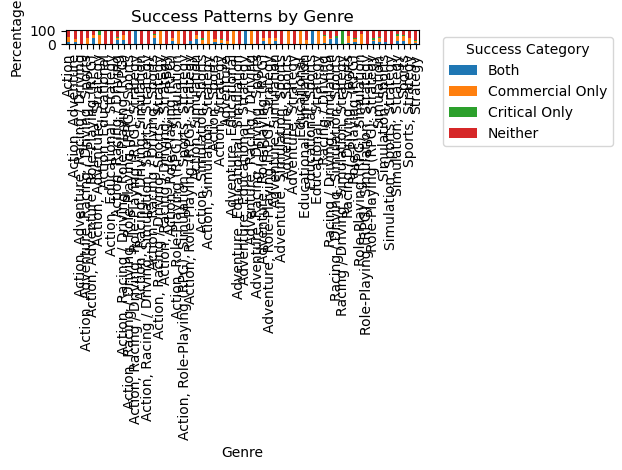

In [34]:
## 3. Success Pattern Visualization

# Create success categories
def get_success_category(row):
    if row['Commercial_Success'] and row['Critical_Success']:
        return 'Both'
    elif row['Commercial_Success']:
        return 'Commercial Only'
    elif row['Critical_Success']:
        return 'Critical Only'
    return 'Neither'

analysis_df['Success_Category'] = analysis_df.apply(get_success_category, axis=1)

# Plot success patterns by genre
plt.figure(dpi=800)
success_by_genre = pd.crosstab(analysis_df['Genre'], 
                              analysis_df['Success_Category'], 
                              normalize='index') * 100
success_by_genre.plot(kind='bar', stacked=True)
plt.title('Success Patterns by Genre')
plt.xlabel('Genre')
plt.ylabel('Percentage')
plt.legend(title='Success Category', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

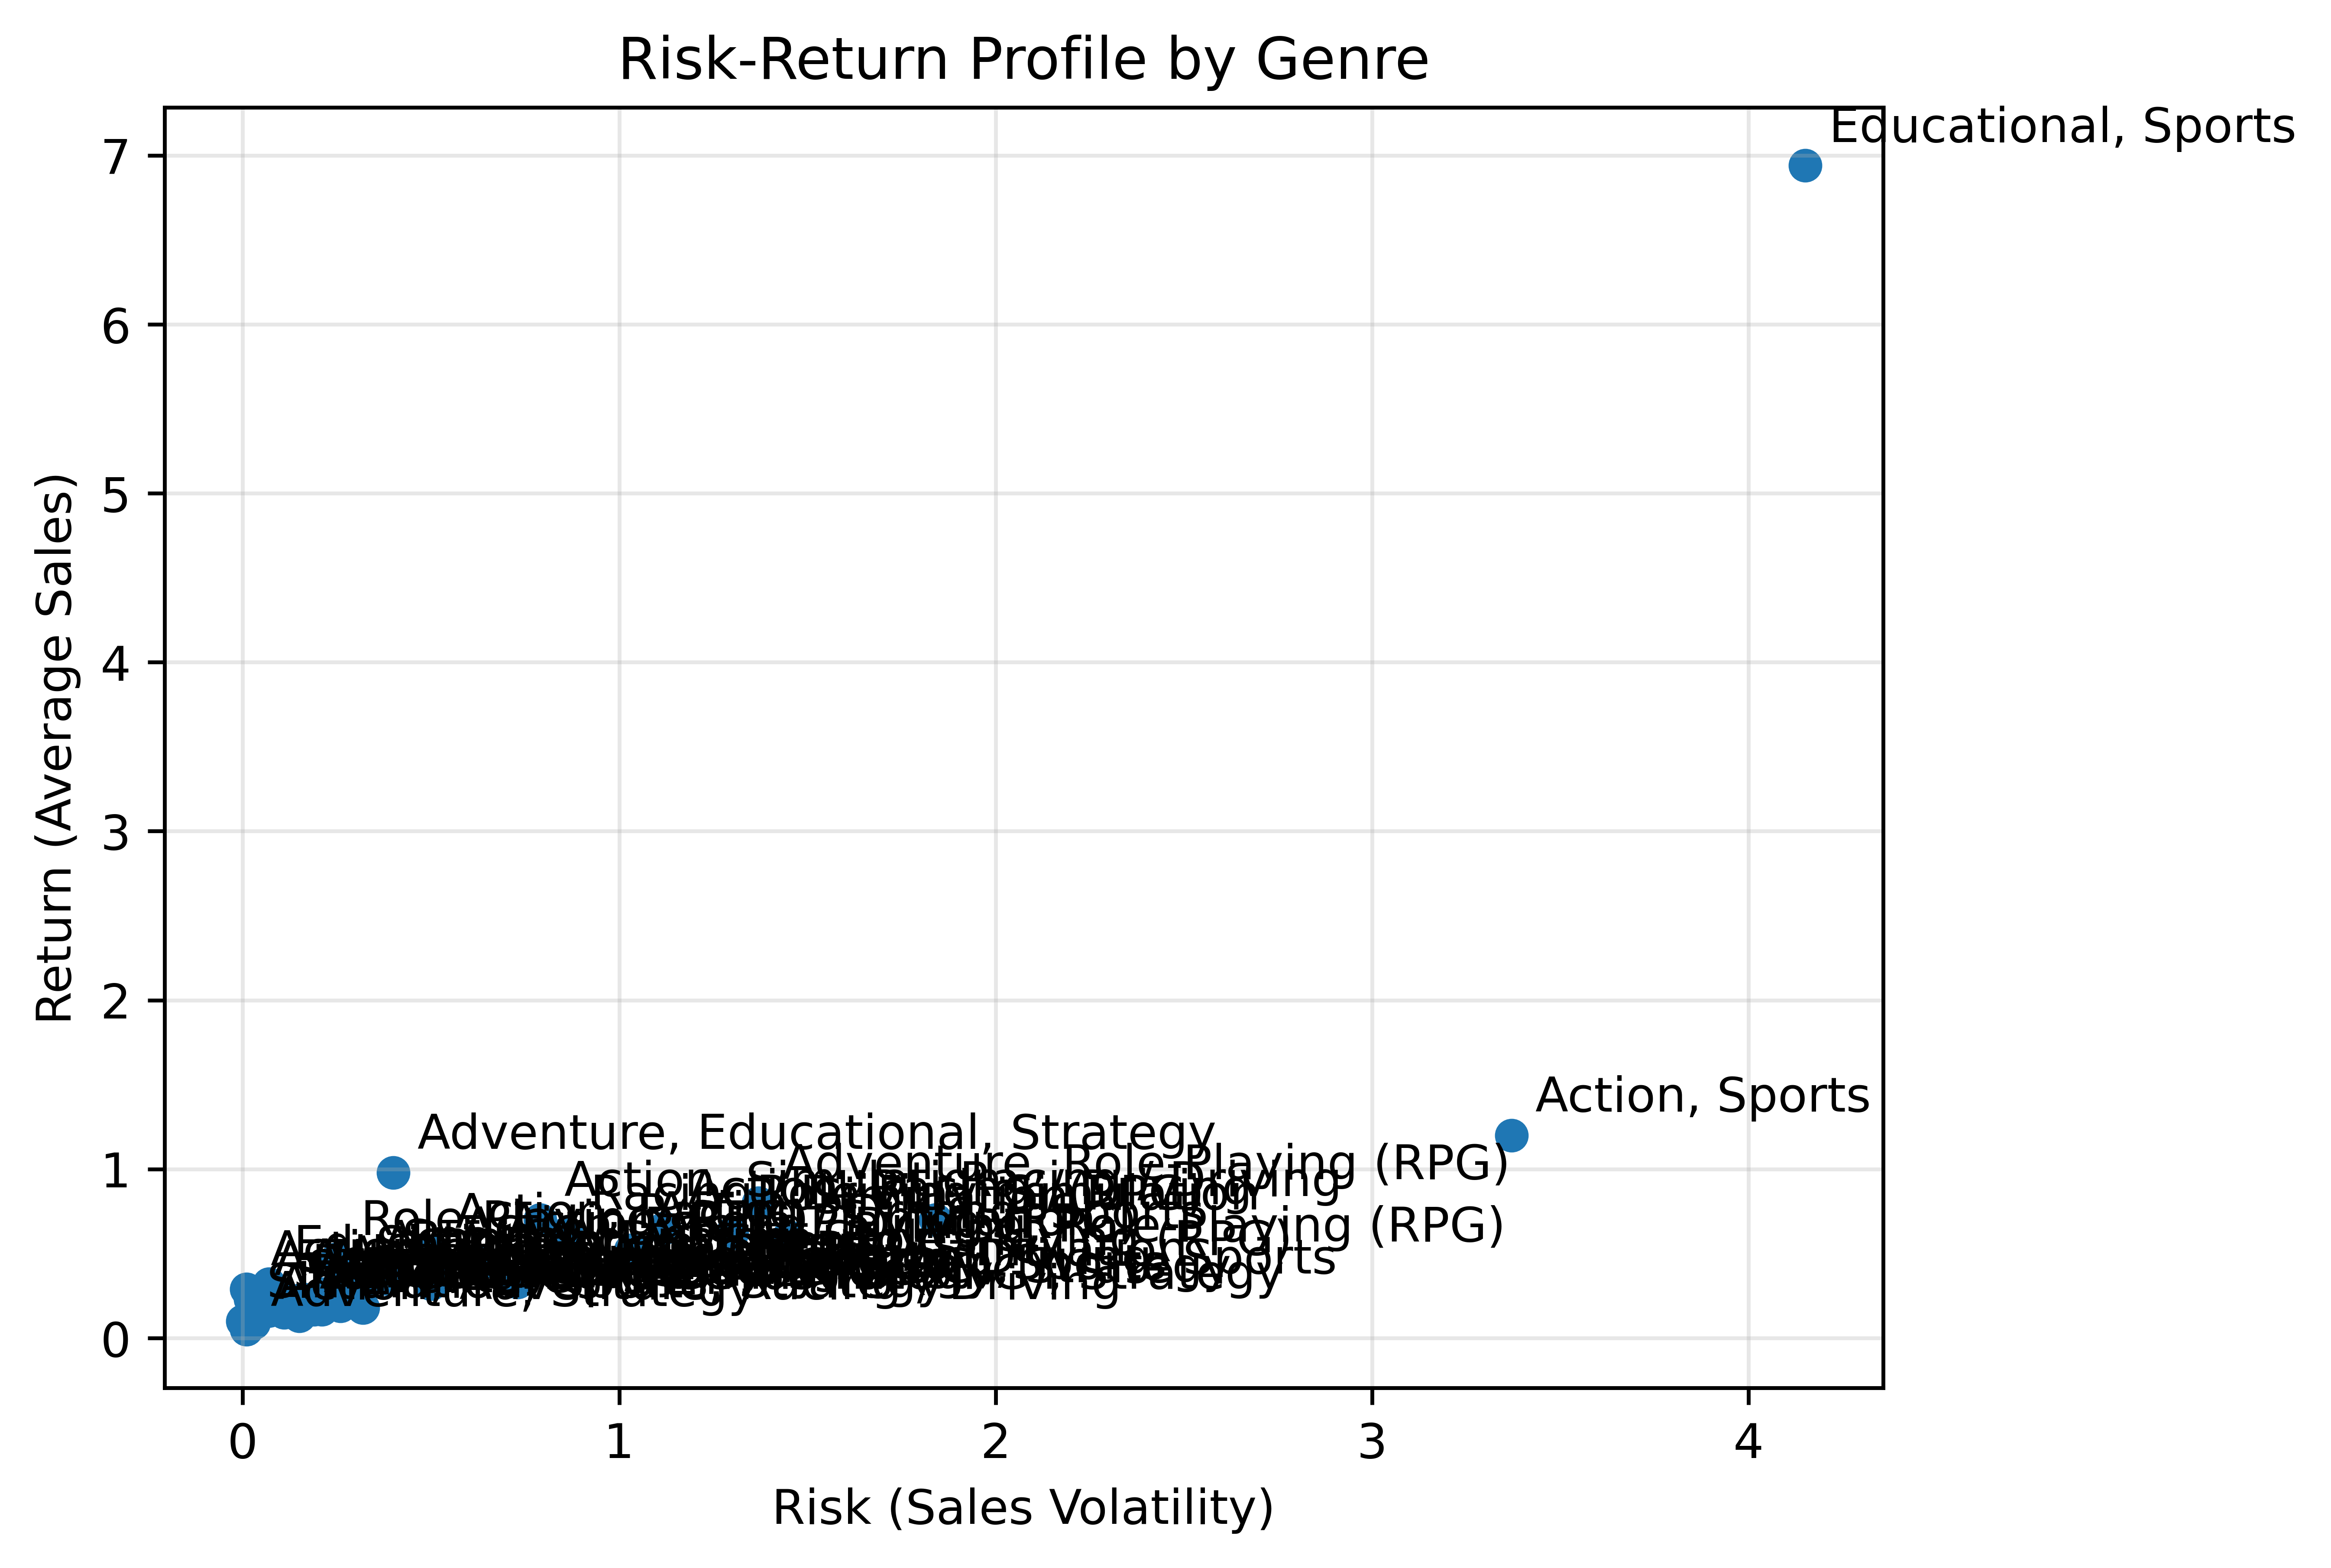

In [35]:
## 4. Risk-Return Analysis

# Calculate risk (standard deviation of sales) and return (mean sales) by genre
risk_return = analysis_df.groupby('Genre').agg({
    'US Sales (millions)': ['mean', 'std']
}).round(2)

risk_return.columns = ['Average_Sales', 'Sales_Volatility']

# Create risk-return plot
plt.figure(dpi=800)
plt.scatter(risk_return['Sales_Volatility'], 
           risk_return['Average_Sales'])

# Annotate points with genre names
for idx, row in risk_return.iterrows():
    plt.annotate(idx, 
                (row['Sales_Volatility'], row['Average_Sales']),
                xytext=(5, 5), 
                textcoords='offset points')

plt.xlabel('Risk (Sales Volatility)')
plt.ylabel('Return (Average Sales)')
plt.title('Risk-Return Profile by Genre')
plt.grid(True, alpha=0.3)
plt.show()

In [36]:

## 5. Summary of Findings
"""
This advanced analysis reveals:
1. Distinct market segments in the video game industry based on critical and commercial performance
2. Genre-specific success patterns and risk-return profiles
3. The relationship between critical acclaim and commercial success varies significantly by genre
4. Some genres show higher risk-adjusted returns than others

Key Business Implications:
1. Different genres require different success metrics and investment strategies
2. There are clear trade-offs between critical acclaim and commercial success
3. Portfolio diversification across genres can help manage risk
4. Some genres consistently outperform in terms of risk-adjusted returns
"""

print("\nAnalysis Summary:")
print(f"Number of identified market segments: {optimal_k}")
print("\nTop performing genres by average sales:")
print(genre_metrics.nlargest(3, 'Avg_Sales')[['Avg_Sales', 'Avg_Review']])


Analysis Summary:
Number of identified market segments: 2

Top performing genres by average sales:
                                  Avg_Sales  Avg_Review
Genre                                                  
Educational, Sports                    6.94       80.33
Action, Sports                         1.20       63.41
Adventure, Educational, Strategy       0.98       84.50


## 4. Conclusion

1. Statistical Interpretation:
    - Observed Difference: 0.958 million units
        - This means highly-rated games (≥80) sold on average about 958,000 more copies in the US than games rated below 80
        - This is a substantial real-world difference in sales

2. P-value = 0.0000
    - This extremely small p-value (p < 0.0001) indicates very strong evidence against the null hypothesis
    - The probability of observing such a large difference in sales by chance if there were truly no relationship between ratings and sales is effectively zero
    - We can reject the null hypothesis that there is no difference in mean sales between high and low rated games

3. Practical Significance:
    - Business Impact:
        - Nearly 1 million additional unit sales represents substantial additional revenue
        - This suggests investing in game quality (as measured by review scores) has tangible financial benefits
    - Industry Implications:
        - Strong evidence that review scores and commercial success are linked
        - Publishers might use this to justify larger development budgets aimed at achieving higher quality 

4. Limitations: 
    - One limitation is that the dataset we are using is a fairly old(from 2004-2010) and not that large when compared the amount of video games availabel today, so it might not be as representative of the current video game industry 
    - Another limitation is that we don't have data on the price of the game itself, only the total sales. For example two games could have sold the same amount of copies, but if one cost more than the other it could have a higher total sales figure or the game with a lower price could have sold more copies and still had a lower total sales figure. 

5. Future Work: 
    - Future research questions could look at other factors that affect sales of video games, not just the review score, for example the genre, the price of game, and more. Analyses might entail using multiple regression analyis to see which factors affect sales the most.  
    - Another research question that could be looked at is how review scores affect sales over time, for example does a higher score mean sales will stay high for longer or does it mean it will just spike on release. Analyses for this could entail a time-series analysis, so you can see how the review score affects the sales over a period time.
